In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]
# List keys of dataset
data.keys()
# print(data)

dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z'])

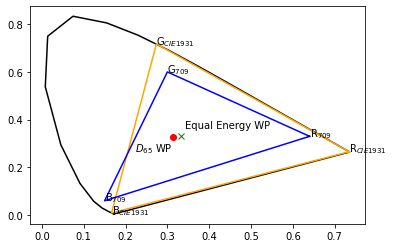

In [2]:
# print(data["x"])
# print(np.shape(data["x"]))

# print(data["x"])

x = data.get("x")
y = data.get("y")
z = data.get("z")
# print(np.shape(x))

n = np.size(x)
shape = (1,n)
x_c = np.zeros(shape)
y_c = np.zeros(shape)
for i in range(n):
    X = x[0,i]
    Y = y[0,i]
    Z = z[0,i]
    x_c[0,i] = X/(X + Y + Z)
    y_c[0,i] = Y/(X + Y + Z)
    
set_CIE_1931 = np.array([[0.73467, 0.26533, 0.0],
                     [0.27376, 0.71741, 0.00883],
                     [0.16658, 0.00886, 0.82456]])

set_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

D65 = np.array([[0.3127, 0.3290, 0.3583]])

EE = np.array([[0.3333, 0.3333, 0.3333]])

location = 3
rgblabel = np.array(['R', 'G', 'B'])
plt.figure()
# Chromaticities
plt.plot(np.append(x_c[0],x_c[0,0]),np.append(y_c[0],y_c[0,0]),'k-')
# RGB CIE 1931
plt.plot(np.append(set_CIE_1931[:,0],set_CIE_1931[0,0]),np.append(set_CIE_1931[:,1],set_CIE_1931[0,1]),color='orange')
for i in range(location):
    plt.text(set_CIE_1931[i,0],set_CIE_1931[i,1],rgblabel[i] + '$_{CIE1931}$')
# RGB 709
plt.plot(np.append(set_709[:,0],set_709[0,0]),np.append(set_709[:,1],set_709[0,1]),color='blue')
for i in range(location):
    plt.text(set_709[i,0],set_709[i,1],rgblabel[i] + '$_{709}$')

plt.plot(D65[0,0],D65[0,1],'ro')
plt.text(D65[0,0]-0.09,D65[0,1]-0.06,'$D_{65}$ WP')
plt.plot(EE[0,0],EE[0,1],'gx')
plt.text(EE[0,0]+0.01,EE[0,1]+0.03,'Equal Energy WP')
# print(x_c)
# print(y_c)
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("chromaticity.tif")
png1.close()